## Clase 8: Regresión

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('datasets/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [15]:
x = df['Height']
y = df['Weight']
x = x.to_frame() #eran series entonces lo cambio a dataframe
y = y.to_frame()
type(y) 

pandas.core.frame.DataFrame

In [7]:
#pip install statsmodels

In [6]:
import statsmodels.api as se

In [9]:
#pip install sklearn

In [11]:
from sklearn import linear_model

In [13]:
ln = linear_model.LinearRegression()
ln

LinearRegression()

In [28]:
model_ls = ln.fit(y,x)

In [29]:
print ('El intercepto de \t:', model_ls.intercept_)
print('El coeficiente son \t:', model_ls.coef_)
print('El valor de r^2 es \t:', model_ls.score(y,x))

El intercepto de 	: [48.47790261]
El coeficiente son 	: [[0.11081279]]
El valor de r^2 es 	: 0.8551742120609958


In [26]:
model_ols = se.OLS.from_formula('x~y',data=df)
result = model_ols.fit() #Height = b0 + bi*weight o alrevez
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                 5.904e+04
Date:                Fri, 26 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:39:30   Log-Likelihood:                -18002.
No. Observations:               10000   AIC:                         3.601e+04
Df Residuals:                    9998   BIC:                         3.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.4779      0.075    645.773      0.000      48.331      48.625
y              0.1108      0.000    242.975      0.000       0.110       0.112
==============================================================================
Omnibus:                        4.617   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.615
Skew:                          -0.053   Prob(JB):                       0.0995
Kurtosis:                       3.000   Cond. No.                         844.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
numeros = ([200,201,94])
numeros = pd.DataFrame(numeros)
numeros

,0
0,200
1,201
2,94


In [40]:
y = model_ls.predict(numeros)
y = pd.DataFrame(y)
y

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,0
0,70.640462
1,70.751274
2,58.894305


In [43]:
#pip install seaborn

In [44]:
import seaborn as sns

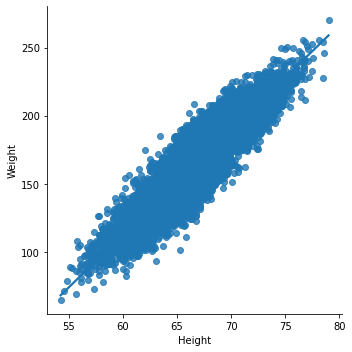

In [47]:
sns.lmplot(x= 'Height',
y = 'Weight',data=df)

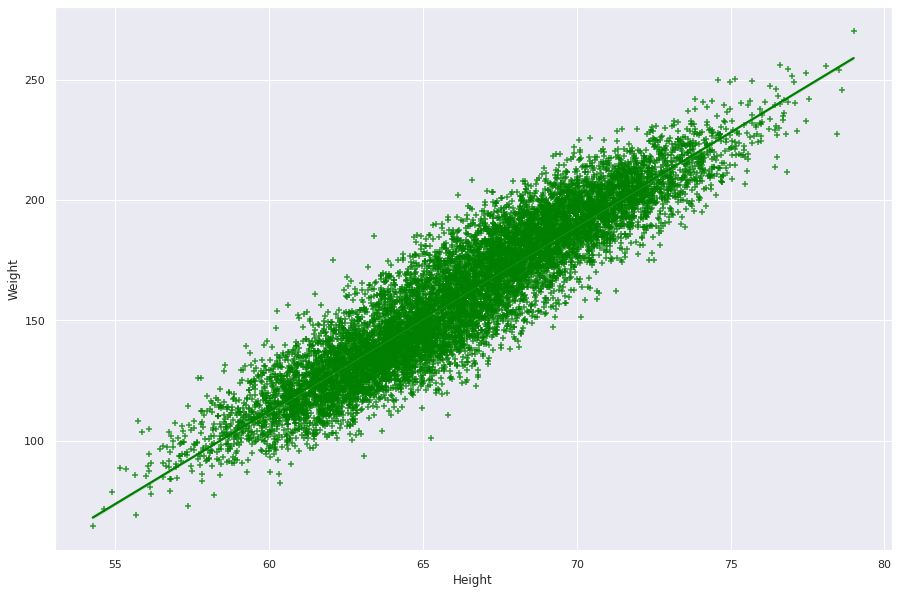

In [56]:
sns.regplot(x= 'Height',
y = 'Weight',data=df,
           color = 'green',
           marker = '+',
           )
sns.set(rc={'figure.figsize':(15,10)})


In [57]:
%ls datasets/

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  tips.csv
Canada.xlsx                mic2.xlsx      weight-height.csv
Cartwheeldata.csv          mic.xlsx


In [59]:
df = pd.read_csv('datasets/nhanes_2015_2016.csv')
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [62]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [65]:
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [68]:
vars = ['SMQ020', 'RIAGENDR', 'RIDAGEYR','BMXWT', 'BMXHT', 'BMXBMI','BMXWAIST', 'HIQ210']

In [69]:
df = df[vars].dropna()
df

,SMQ020,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI,BMXWAIST,HIQ210
0,1,1,62,94.8,184.5,27.8,101.1,2.0
2,1,1,78,83.4,170.1,28.8,116.5,2.0
3,2,2,56,109.8,160.9,42.4,110.1,2.0
4,2,2,42,55.2,164.9,20.3,80.4,2.0
7,2,2,32,64.5,151.3,28.2,93.3,2.0
...,...,...,...,...,...,...,...,...
5729,2,1,25,39.2,136.5,21.0,75.4,2.0
5730,1,2,76,59.1,165.8,21.5,95.0,2.0
5731,2,1,26,112.1,182.2,33.8,110.2,2.0
5733,1,1,35,78.2,173.3,26.0,98.9,2.0


In [70]:
df.corr()

,SMQ020,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI,BMXWAIST,HIQ210
SMQ020,1.000000,0.162001,-0.165156,-0.090778,-0.144145,-0.030627,-0.113271,0.011936
RIAGENDR,0.162001,1.000000,-0.035112,-0.243550,-0.673876,0.070217,-0.082869,-0.030153
RIDAGEYR,-0.165156,-0.035112,1.000000,-0.010968,-0.151011,0.060292,0.229132,0.077028
BMXWT,-0.090778,-0.243550,-0.010968,1.000000,0.434392,0.884790,0.891397,0.030241
BMXHT,-0.144145,-0.673876,-0.151011,0.434392,1.000000,-0.021299,0.152365,0.015730
BMXBMI,-0.030627,0.070217,0.060292,0.884790,-0.021299,1.000000,0.909613,0.023058
BMXWAIST,-0.113271,-0.082869,0.229132,0.891397,0.152365,0.909613,1.000000,0.040710
HIQ210,0.011936,-0.030153,0.077028,0.030241,0.015730,0.023058,0.040710,1.000000


## BMXWT = B0 + B1*RIDAGEYR

In [71]:
model = sm.OLS.from_formula('BMXWT~RIDAGEYR', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BMXWT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5299
Date:                Fri, 26 Nov 2021   Prob (F-statistic):              0.467
Time:                        14:35:26   Log-Likelihood:                -19783.
No. Observations:                4407   AIC:                         3.957e+04
Df Residuals:                    4405   BIC:                         3.958e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.0724      0.926     88.661      0.000      80.258      83.887
RIDAGEYR      -0.0128      0.018     -0.728      0.467      -0.047       0.022
==============================================================================
Omnibus:                      532.388   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.772
Skew:                           0.885   Prob(JB):                    2.62e-173
Kurtosis:                       4.092   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
df['RiaGENDR']=df.RIAGENDR.replace({1:'Male', 2:'Female'})
df

,SMQ020,RIAGENDR,RIDAGEYR,BMXWT,BMXHT,BMXBMI,BMXWAIST,HIQ210,RiaGENDR
0,1,1,62,94.8,184.5,27.8,101.1,2.0,Male
2,1,1,78,83.4,170.1,28.8,116.5,2.0,Male
3,2,2,56,109.8,160.9,42.4,110.1,2.0,Female
4,2,2,42,55.2,164.9,20.3,80.4,2.0,Female
7,2,2,32,64.5,151.3,28.2,93.3,2.0,Female
...,...,...,...,...,...,...,...,...,...
5729,2,1,25,39.2,136.5,21.0,75.4,2.0,Male
5730,1,2,76,59.1,165.8,21.5,95.0,2.0,Female
5731,2,1,26,112.1,182.2,33.8,110.2,2.0,Male
5733,1,1,35,78.2,173.3,26.0,98.9,2.0,Male


## BMXWT = B0 + B1*RIDAGEYR + B2*(Male + Female)
Female: 
## BMXWT = 77.5710 - 0.0228*RIDAGEYR + 10.5371Male 

In [74]:
model = sm.OLS.from_formula('BMXWT~RIDAGEYR+RiaGENDR', data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BMXWT   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     139.8
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           1.36e-59
Time:                        14:43:55   Log-Likelihood:                -19647.
No. Observations:                4407   AIC:                         3.930e+04
Df Residuals:                    4404   BIC:                         3.932e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           77.5710      0.937     82.755      0.000      75.733      79.409
RiaGENDR[T.Male]    10.5371      0.631     16.704      0.000       9.300      11.774
RIDAGEYR            -0.0228      0.017     -1.337      0.181      -0.056       0.011
==============================================================================
Omnibus:                      609.527   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              956.345
Skew:                           0.965   Prob(JB):                    2.15e-208
Kurtosis:                       4.217   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""